In [5]:
import pandas as pd

df = pd.read_parquet("..\\..\\features.parquet.gzip")
index_df = df.copy()

In [60]:
cols = ['release_date','energy','danceability','tempo','valence','acousticness','track_popularity']
df = df[cols]
df['release_date'] = df['release_date'].str[0:4].astype(int)
df = df.rename(columns={'release_date':'release_year'})
df

C:\Users\jacob\AppData\Local\Temp\ipykernel_27980\1407746060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = df['release_date'].str[0:4].astype(int)


,release_year,energy,danceability,tempo,valence,acousticness,track_popularity
0,2002,0.900,0.487,149.937,0.484,0.000068,73.0
1,2008,0.692,0.762,114.906,0.397,0.113000,70.0
2,2015,0.760,0.654,99.945,0.410,0.079700,78.0
3,2010,0.682,0.767,127.975,0.833,0.011300,70.0
4,2014,0.800,0.647,160.078,0.942,0.064700,78.0
...,...,...,...,...,...,...,...
1233814,2018,0.706,0.722,124.013,0.517,0.161000,0.0
1233845,2014,0.934,0.514,127.953,0.182,0.052500,28.0
1233856,2009,0.937,0.762,128.021,0.546,0.050400,0.0
1233903,2013,0.727,0.586,124.989,0.496,0.002470,51.0


In [61]:
df = df[df['release_year'] >= 1900]
df = df[(df['tempo'] <= 220) & (df['tempo'] >= 60)]
df

,release_year,energy,danceability,tempo,valence,acousticness,track_popularity
0,2002,0.900,0.487,149.937,0.484,0.000068,73.0
1,2008,0.692,0.762,114.906,0.397,0.113000,70.0
2,2015,0.760,0.654,99.945,0.410,0.079700,78.0
3,2010,0.682,0.767,127.975,0.833,0.011300,70.0
4,2014,0.800,0.647,160.078,0.942,0.064700,78.0
...,...,...,...,...,...,...,...
1233814,2018,0.706,0.722,124.013,0.517,0.161000,0.0
1233845,2014,0.934,0.514,127.953,0.182,0.052500,28.0
1233856,2009,0.937,0.762,128.021,0.546,0.050400,0.0
1233903,2013,0.727,0.586,124.989,0.496,0.002470,51.0


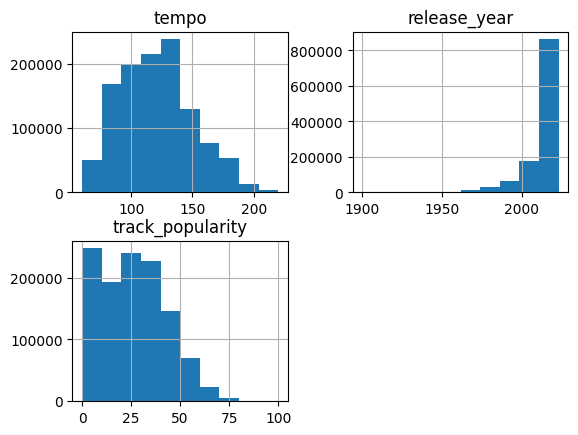

In [62]:
import matplotlib.pyplot as plt
df.hist(column=['tempo','release_year','track_popularity'])
plt.title('Distribution')
plt.xlabel('values')
plt.ylabel('qty')
plt.show()

(array([ 50664., 168591., 199798., 215628., 238800., 130747.,  77675.,
         53594.,  13321.,   3004.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

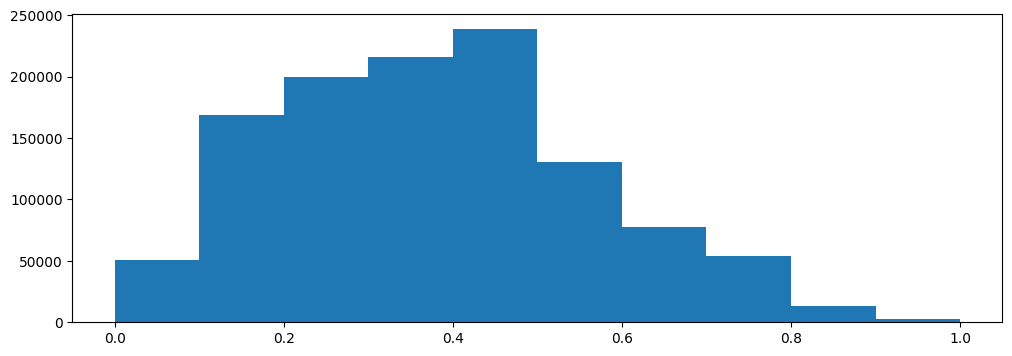

In [63]:
# standarize tempo bcuz normal distribution
# normalize the other two
from sklearn import preprocessing

mms = preprocessing.MinMaxScaler()
processed_tempo = df['tempo'].values
processed_tempo = pd.DataFrame(processed_tempo)
processed_tempo = mms.fit_transform(processed_tempo)
fig,ax = plt.subplots(figsize=(12,4))
ax.hist(processed_tempo[:,0])

(array([8.10000e+01, 1.70000e+01, 1.35000e+02, 2.68000e+02, 3.64700e+03,
        1.61530e+04, 2.96190e+04, 6.45230e+04, 1.75043e+05, 8.62336e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

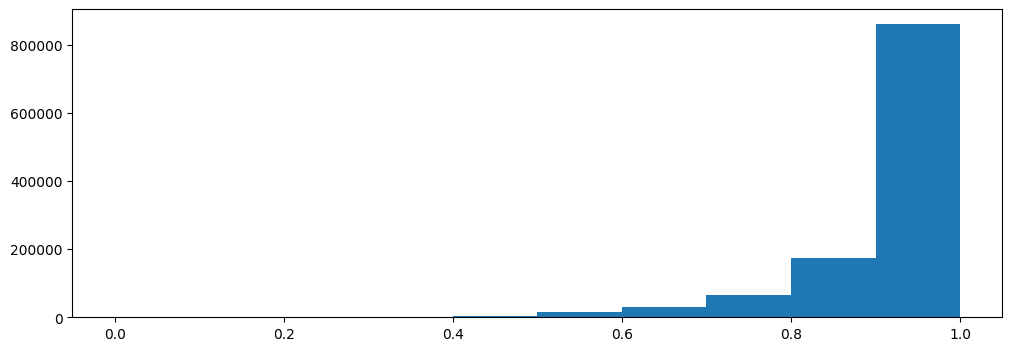

In [64]:
mms = preprocessing.MinMaxScaler()
processed_year = df['release_year'].values
processed_year = pd.DataFrame(processed_year)
processed_year = mms.fit_transform(processed_year)
fig,ax = plt.subplots(figsize=(12,4))
ax.hist(processed_year[:,0])

In [65]:
df['track_popularity']

0          73.0
1          70.0
2          78.0
3          70.0
4          78.0
           ... 
1233814     0.0
1233845    28.0
1233856     0.0
1233903    51.0
1233923    32.0
Name: track_popularity, Length: 1151822, dtype: float64

(array([2.47560e+05, 1.92782e+05, 2.65587e+05, 2.02109e+05, 1.46235e+05,
        7.34120e+04, 1.86600e+04, 4.87700e+03, 5.71000e+02, 2.90000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

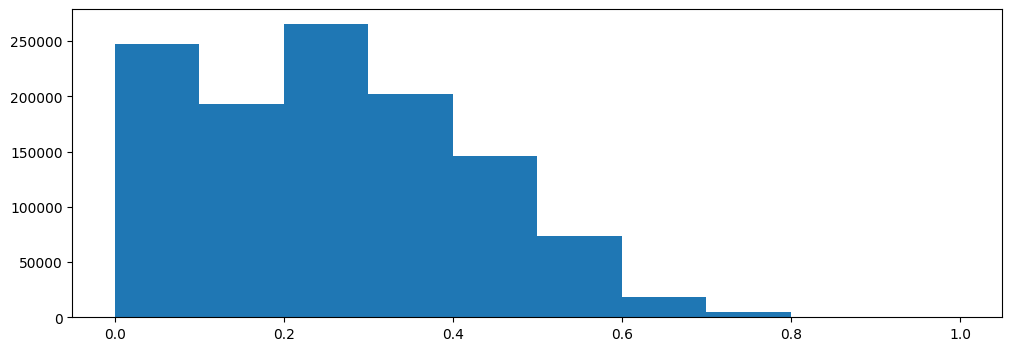

In [66]:
mms = preprocessing.MinMaxScaler()
processed_popularity = df['track_popularity'].values
processed_popularity = pd.DataFrame(processed_popularity)
processed_popularity = mms.fit_transform(processed_popularity)
fig,ax = plt.subplots(figsize=(12,4))
ax.hist(processed_popularity[:,0])

In [71]:
df['track_popularity'] = processed_popularity
df['tempo'] = processed_tempo
df['release_year'] = processed_year

df

,release_year,energy,danceability,tempo,valence,acousticness,track_popularity
0,0.829268,0.900,0.487,0.562106,0.484,0.000068,0.73
1,0.878049,0.692,0.762,0.343163,0.397,0.113000,0.70
2,0.934959,0.760,0.654,0.249656,0.410,0.079700,0.78
3,0.894309,0.682,0.767,0.424844,0.833,0.011300,0.70
4,0.926829,0.800,0.647,0.625487,0.942,0.064700,0.78
...,...,...,...,...,...,...,...
1233814,0.959350,0.706,0.722,0.400081,0.517,0.161000,0.00
1233845,0.926829,0.934,0.514,0.424706,0.182,0.052500,0.28
1233856,0.886179,0.937,0.762,0.425131,0.546,0.050400,0.00
1233903,0.918699,0.727,0.586,0.406181,0.496,0.002470,0.51


In [72]:
df.to_parquet('processed_features.parquet.gzip',compression='gzip')

In [6]:
# df = df[df['release_year'] >= 1900]
# df = df[(df['tempo'] <= 220) & (df['tempo'] >= 60)]

# Get track name
# Get artist1 - artist5 as a list of values
# Get album name

index_df['release_date'] = index_df['release_date'].str[0:4].astype(int)
index_df = index_df[index_df['release_date'] >= 1900]
index_df = index_df[(index_df['tempo'] <= 220) & (index_df['tempo'] >= 60)]

index_df


,track_uri,track_name,artist1,artist2,artist3,artist4,artist5,album_name,release_date,danceability,energy,track_popularity,acousticness,valence,tempo
0,spotify:track:00Mb3DuaIH1kjrwOku9CGU,Sk8er Boi,Avril Lavigne,None,None,None,None,Let Go,2002,0.487,0.900,73.0,0.000068,0.484,149.937
1,spotify:track:02XnQdf7sipaKBBHixz3Zp,Paparazzi,Lady Gaga,None,None,None,None,The Fame,2008,0.762,0.692,70.0,0.113000,0.397,114.906
2,spotify:track:09CtPGIpYB4BrO8qb1RGsF,Sorry,Justin Bieber,None,None,None,None,Purpose (Deluxe),2015,0.654,0.760,78.0,0.079700,0.410,99.945
3,spotify:track:0C4ejWmOTMv8vuYj85mf8m,S&M,Rihanna,None,None,None,None,Loud,2010,0.767,0.682,70.0,0.011300,0.833,127.975
4,spotify:track:0cqRj7pUJDkTCEsJkx8snD,Shake It Off,Taylor Swift,None,None,None,None,1989 (Deluxe),2014,0.647,0.800,78.0,0.064700,0.942,160.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233814,spotify:track:3CG3RfisS4Ihe0qCs8x230,Wrong Move,Olivia Holt,R3HAB,THRDL!FE,None,None,The Wave,2018,0.722,0.706,0.0,0.161000,0.517,124.013
1233845,spotify:track:4f8mP5u0fN4tDAbUdD0808,Howl At The Moon - Radio Edit,Stadiumx,Taylr Renee,None,None,None,Nicky Romero presents Miami 2014,2014,0.514,0.934,28.0,0.052500,0.182,127.953
1233856,spotify:track:4uOrSlPJOfhibX5Mw6IUke,Let The Bass Kick In Miami Girl - Radio Edit,Chuckie,LMFAO,None,None,None,Let The Bass Kick In Miami Girl,2009,0.762,0.937,0.0,0.050400,0.546,128.021
1233903,spotify:track:63bwUT2JAPomuoIITQ2Iiy,You Make Me,Avicii,None,None,None,None,True (Bonus Edition),2013,0.586,0.727,51.0,0.002470,0.496,124.989


In [8]:
columns = ['track_name','artist1','artist2','artist3','artist4','artist5','album_name']
index_df = index_df[columns]
index_df.head()

,track_name,artist1,artist2,artist3,artist4,artist5,album_name
0,Sk8er Boi,Avril Lavigne,None,None,None,None,Let Go
1,Paparazzi,Lady Gaga,None,None,None,None,The Fame
2,Sorry,Justin Bieber,None,None,None,None,Purpose (Deluxe)
3,S&M,Rihanna,None,None,None,None,Loud
4,Shake It Off,Taylor Swift,None,None,None,None,1989 (Deluxe)


In [9]:
index_df.to_parquet('index_of_songs.parquet.gzip',compression='gzip')